In [1]:
import yfinance as yf

In [2]:
#Stocks that are to be analyzed
stocks=['AAPL','AXP','CRM','CVX','DIS','JNJ','JPM','MSFT','PG','UNH','^IXIC']

#AAPL: Apple
#CVX:Chevron 
#JPM:JPMorgan Chase & Co.
#MSFT:Microsoft
#CRM:Salesforce Inc
#DIS:Walt Disney Co
#AXP:American Express
#JNJ: Johnson & Johnson
#UNH:United Health Group
#PG:Proctor & Gamble
#^IXIC:Nasdaq Composite

In [3]:
# Start and End dates of stocks data 
start = '2018-01-01'
end = '2023-04-01'
# load the data for each stock
data = yf.download(stocks, start=start, end=end)["Close"]
# look at the data
data.head()

[*********************100%***********************]  11 of 11 completed


,AAPL,AXP,CRM,CVX,DIS,JNJ,JPM,MSFT,PG,UNH,^IXIC
Date,,,,,,,,,,,
2018-01-02,43.064999,98.940002,104.410004,127.580002,111.800003,139.229996,107.949997,85.949997,90.650002,221.160004,7006.899902
2018-01-03,43.057499,99.550003,105.290001,128.509995,112.279999,140.559998,108.059998,86.349998,90.540001,223.479996,7065.529785
2018-01-04,43.257500,100.849998,106.680000,128.110001,112.230003,140.550003,109.040001,87.110001,91.180000,224.449997,7077.910156
2018-01-05,43.750000,101.080002,108.099998,127.900002,111.620003,141.710007,108.339996,88.190002,91.239998,228.729996,7136.560059
2018-01-08,43.587502,100.150002,108.860001,128.529999,110.019997,141.889999,108.500000,88.279999,91.720001,224.759995,7157.390137


This code loads the historical stock data for multiple stocks using Yahoo Finance's API (yfinance or yf), and selects the "Close" column of the stock data. The variable stocks contains a list of stock symbols. start and end are the start and end dates for which the stock data is to be downloaded, and data is a pandas DataFrame object containing the historical daily closing prices for the specified stocks from start to end.

The .head() method is then used to display the first few rows of the data.

In [4]:
data.isna().sum()

AAPL     0
AXP      0
CRM      0
CVX      0
DIS      0
JNJ      0
JPM      0
MSFT     0
PG       0
UNH      0
^IXIC    0
dtype: int64

In [5]:
data[data['^IXIC'].isna()]

,AAPL,AXP,CRM,CVX,DIS,JNJ,JPM,MSFT,PG,UNH,^IXIC
Date,,,,,,,,,,,


In [6]:
data.dropna(inplace=True)

In [7]:
# Calculating the every day returns for each stock in the given time period
ret = data.pct_change()
ret.tail()

,AAPL,AXP,CRM,CVX,DIS,JNJ,JPM,MSFT,PG,UNH,^IXIC
Date,,,,,,,,,,,
2023-03-27,-0.012293,0.020904,0.006314,0.010188,0.016369,0.004258,0.028661,-0.014934,-0.005248,0.012416,-0.004662
2023-03-28,-0.003980,-0.023970,0.005438,0.011671,-0.008366,-0.009654,0.003035,-0.004161,0.002809,-0.019340,-0.004483
2023-03-29,0.019791,0.027511,0.022569,0.008590,0.021620,0.009814,0.002017,0.019184,0.003075,-0.012675,0.017938
2023-03-30,0.009890,-0.007213,-0.000203,0.009511,0.012697,0.000783,-0.003020,0.012620,0.004359,0.007437,0.007314
2023-03-31,0.015644,0.015639,0.016175,0.004742,0.020693,0.010233,0.012116,0.014962,0.008410,0.005382,0.017351


In [8]:
ret.dropna(inplace=True)

In [9]:
ret.describe()

,AAPL,AXP,CRM,CVX,DIS,JNJ,JPM,MSFT,PG,UNH,^IXIC
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.001235,0.000661,0.000793,0.000436,0.000125,0.000167,0.000344,0.001108,0.000468,0.000748,0.000551
std,0.020868,0.023576,0.024638,0.022232,0.020449,0.013045,0.020095,0.019544,0.013691,0.018554,0.016070
min,-0.128647,-0.148187,-0.158885,-0.221248,-0.131632,-0.100379,-0.149649,-0.147390,-0.087373,-0.172769,-0.123213
25%,-0.009103,-0.009492,-0.011006,-0.009163,-0.009661,-0.005926,-0.008727,-0.008464,-0.005740,-0.007597,-0.006747
50%,0.001244,0.000620,0.001033,0.000767,-0.000075,0.000349,0.000074,0.001157,0.000747,0.001018,0.001198
75%,0.012455,0.010407,0.013455,0.010008,0.009359,0.006474,0.009667,0.011076,0.007325,0.009243,0.008925
max,0.119808,0.218823,0.260449,0.227407,0.144123,0.079977,0.180125,0.142169,0.120090,0.127989,0.093460


In [10]:
ret.head()

,AAPL,AXP,CRM,CVX,DIS,JNJ,JPM,MSFT,PG,UNH,^IXIC
Date,,,,,,,,,,,
2018-01-03,-0.000174,0.006165,0.008428,0.007289,0.004293,0.009553,0.001019,0.004654,-0.001213,0.010490,0.008367
2018-01-04,0.004645,0.013059,0.013202,-0.003113,-0.000445,-0.000071,0.009069,0.008801,0.007069,0.004340,0.001752
2018-01-05,0.011385,0.002281,0.013311,-0.001639,-0.005435,0.008253,-0.006420,0.012398,0.000658,0.019069,0.008286
2018-01-08,-0.003714,-0.009201,0.007031,0.004926,-0.014334,0.001270,0.001477,0.001020,0.005261,-0.017357,0.002919
2018-01-09,-0.000115,0.003694,0.002664,-0.005368,-0.000727,0.015857,0.005069,-0.000680,-0.007305,0.004983,0.000865


In [11]:
# Predicting the returns using CAPM method.
import numpy as np
risk_free_rate = 0.01                 
mar_ret = ret['^IXIC'].mean() 
beta = np.cov(ret[stocks].T, ret['^IXIC'], ddof=1)[0:10, 10] / np.var(ret['^IXIC'], ddof=1)
beta = beta.reshape((10, 1))
print(beta)

exp_ret = risk_free_rate + beta * (mar_ret - risk_free_rate)
print('Expected Returns (CAPM):')
print(exp_ret)

[[1.10232604]
 [0.90620286]
 [1.14667906]
 [0.67594093]
 [0.80293094]
 [0.3783524 ]
 [0.74887609]
 [1.08462814]
 [0.39506132]
 [0.64216569]]
Expected Returns (CAPM):
[[-0.00041563]
 [ 0.00143749]
 [-0.00083471]
 [ 0.00361319]
 [ 0.00241329]
 [ 0.00642503]
 [ 0.00292404]
 [-0.00024841]
 [ 0.00626715]
 [ 0.00393232]]


Based on the output, we can observe that the expected returns of some stocks are positive, while others are negative. Positive expected returns indicate that an investor can expect to earn a return greater than the risk-free rate by investing in those stocks, while negative expected returns suggest that the investor may earn less than the risk-free rate.

We can also observe that the expected returns of different stocks vary widely. For example, the expected return of  MSFT is the highest at 0.0064, while the expected return of DIS is the lowest at -0.0008. This suggests that different stocks have different levels of risk and expected return, which is one of the key factors that investors consider when making investment decisions.

In [26]:
#  efficient frontier
from scipy.optimize import minimize
mean_ret = ret.mean()
cov_mat = ret.cov()
num_portfolios = 15000
portfolio_weights = np.zeros((num_portfolios, len(stocks)))
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.uniform(size=len(stocks))
    weights = weights / np.sum(weights)
    portfolio_weights[i, :] = weights
    portfolio_returns[i] = np.sum(mean_ret * weights)
    portfolio_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
    sharpe_ratio[i] = portfolio_returns[i] / portfolio_volatility[i]

# Identify the portfolio with the highest Sharpe ratio
max_sharpe_idx = sharpe_ratio.argmax()
max_sharpe_portfolio = portfolio_weights[max_sharpe_idx, :]
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_volatility = portfolio_volatility[max_sharpe_idx]

# Calculate the efficient frontier as a function of volatility
ef_volatility = np.linspace(portfolio_volatility.min(), portfolio_volatility.max(), num=100)
ef_returns = np.zeros_like(ef_volatility)

for i, v in enumerate(ef_volatility):
    constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x:  portfolio_volatility[i] - v})
    result = minimize(lambda x: -np.dot(x, mean_ret) / np.sqrt(np.dot(x.T, np.dot(cov_mat, x))), 
                      x0=np.random.uniform(size=len(stocks)), 
                      method='SLSQP',
                      bounds=[(0, 1) for j in range(len(stocks))],
                      constraints=constraints)
    ef_returns[i] = -result.fun

# Calculate the Treynor's ratio
treynor_ratio = (mean_ret - risk_free_rate) / beta.mean()
print('Weights:',max_sharpe_portfolio )
print('Return:',max_sharpe_return)
print('Volatility:',max_sharpe_volatility )
print('\nTreynor\'s ratio:')
print(treynor_ratio)

Weights: [0.19373376 0.00479446 0.05994023 0.06130064 0.00168703 0.02005161
 0.04963768 0.20953028 0.28774852 0.08396819 0.0276076 ]
Return: 0.0007823737771983729
Volatility: 0.014061047243853144

Treynor's ratio:
AAPL    -0.011118
AXP     -0.011847
CRM     -0.011680
CVX     -0.012133
DIS     -0.012527
JNJ     -0.012474
JPM     -0.012249
MSFT    -0.011279
PG      -0.012091
UNH     -0.011736
^IXIC   -0.011986
dtype: float64


The code above performs an analysis of a portfolio composed of 11 different stocks, namely AAPL, AXP, CRM, CVX, DIS, JNJ, JPM, MSFT, PG, UNH, and ^IXIC (which represents the NASDAQ Composite Index).

The efficient frontier is calculated using a Monte Carlo simulation with 15,000 iterations. For each iteration, the code generates a set of random weights for each stock in the portfolio, then calculates the expected return, volatility, and Sharpe ratio of that particular portfolio. The Sharpe ratio is a measure of risk-adjusted return and is calculated as the portfolio's expected return divided by its volatility.

After generating the 10,000 portfolios, the code identifies the one with the highest Sharpe ratio and prints out its weights, expected return, and volatility. The efficient frontier is then calculated by varying the volatility and finding the portfolio with the highest expected return for each level of volatility.
 a volatility of 1.5%, which means that for every unit of risk, the portfolio is expected to generate a return of 0.08%.



In [17]:
stocks[:-1]

['AAPL', 'AXP', 'CRM', 'CVX', 'DIS', 'JNJ', 'JPM', 'MSFT', 'PG', 'UNH']

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Plot rolling statistics
    plt.figure(figsize=(5, 5))
    orig = plt.plot(timeseries, color='red', label='Original')
    mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Plot ACF and PACF
    plot_acf(timeseries, lags=20)
    plt.title('Autocorrelation Function')
    plt.show()

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(timeseries, model='additive')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot seasonal decomposition
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [28]:
# Define the function to check stationarity
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Define the function to check stationarity
def check_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)



Checking stationarity for AAPL:


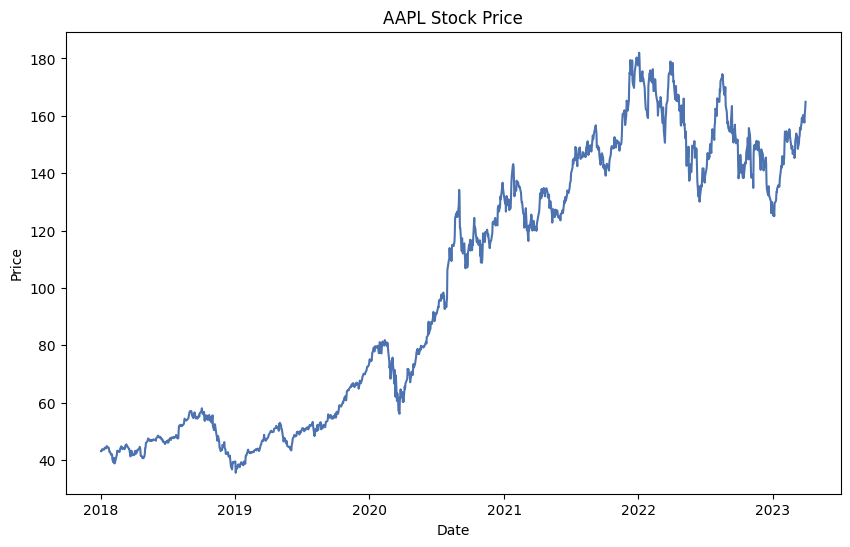

ADF Statistic: -0.7014320162037633
p-value: 0.8463782646385775
Critical Values:
   1%: -3.4353554773774553
   5%: -2.86375051023515
   10%: -2.5679468876340037
Checking stationarity for AXP:


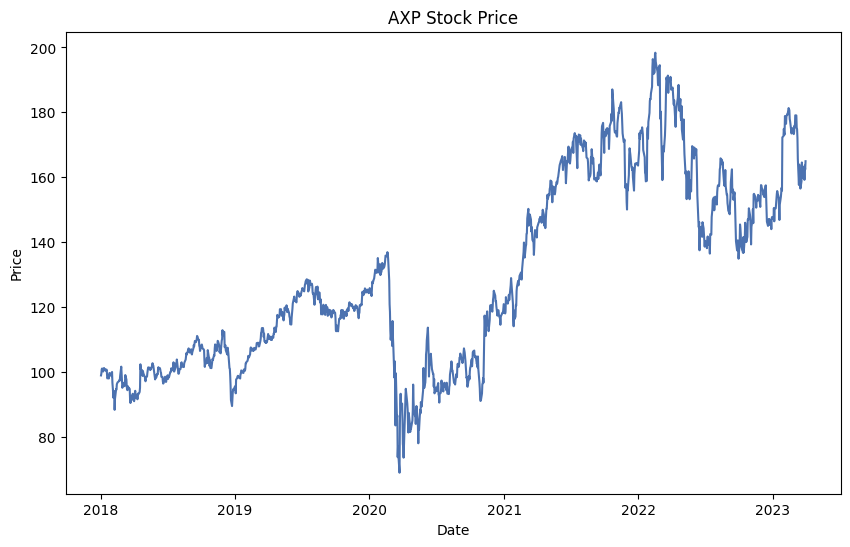

ADF Statistic: -1.5565094111814628
p-value: 0.5053950711878671
Critical Values:
   1%: -3.435340198430096
   5%: -2.863743768394356
   10%: -2.567943297315671
Checking stationarity for CRM:


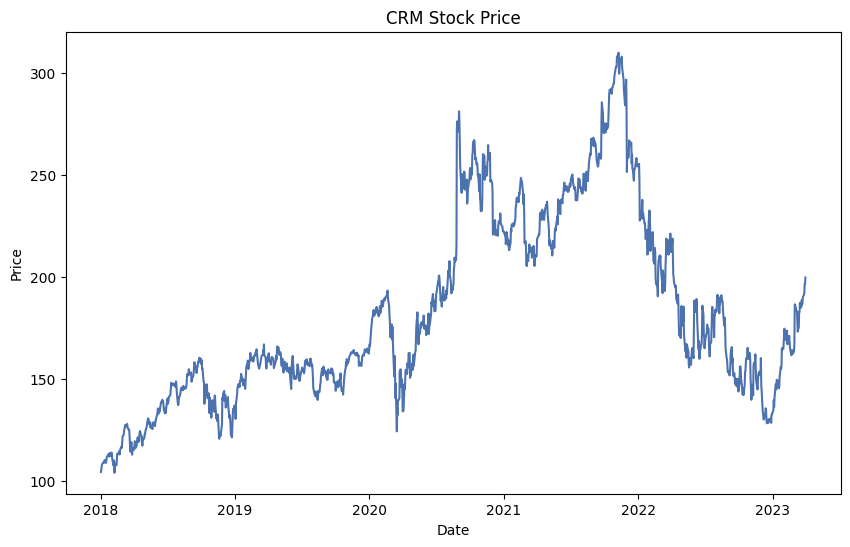

ADF Statistic: -2.010751195659798
p-value: 0.28187906169839544
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for CVX:


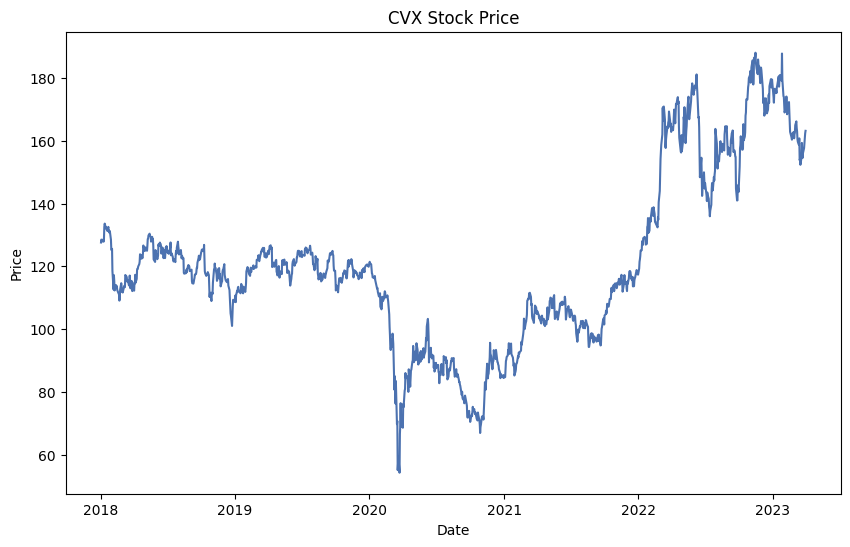

ADF Statistic: -1.3243069671812975
p-value: 0.617979791360995
Critical Values:
   1%: -3.435340198430096
   5%: -2.863743768394356
   10%: -2.567943297315671
Checking stationarity for DIS:


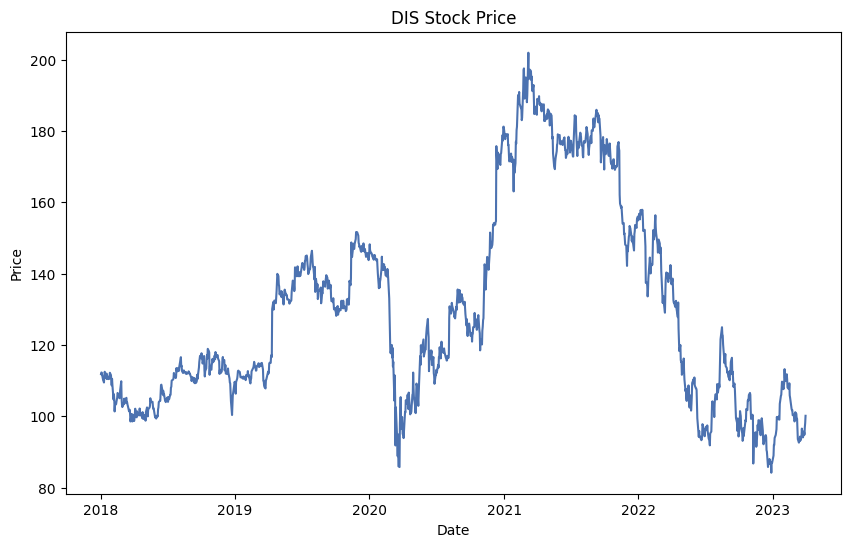

ADF Statistic: -1.596498432468659
p-value: 0.4853522047380071
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373
Checking stationarity for JNJ:


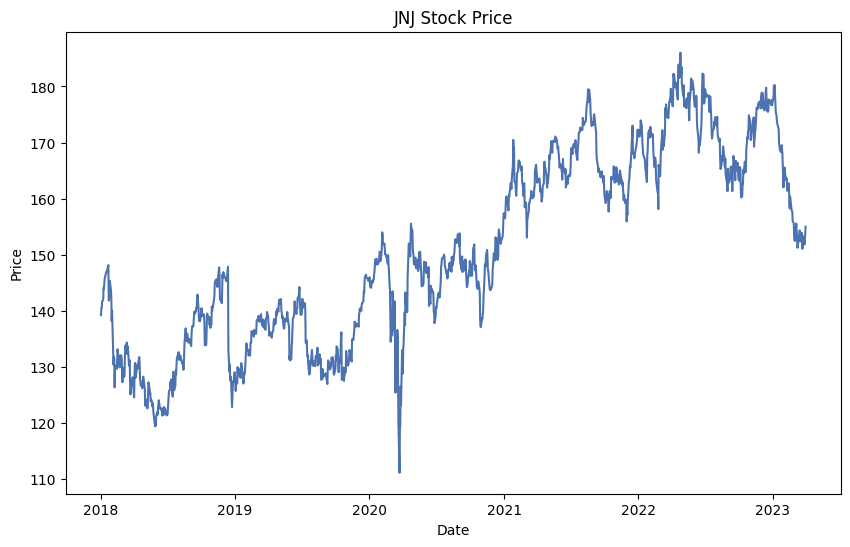

ADF Statistic: -1.777359376582526
p-value: 0.3917586444760066
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373
Checking stationarity for JPM:


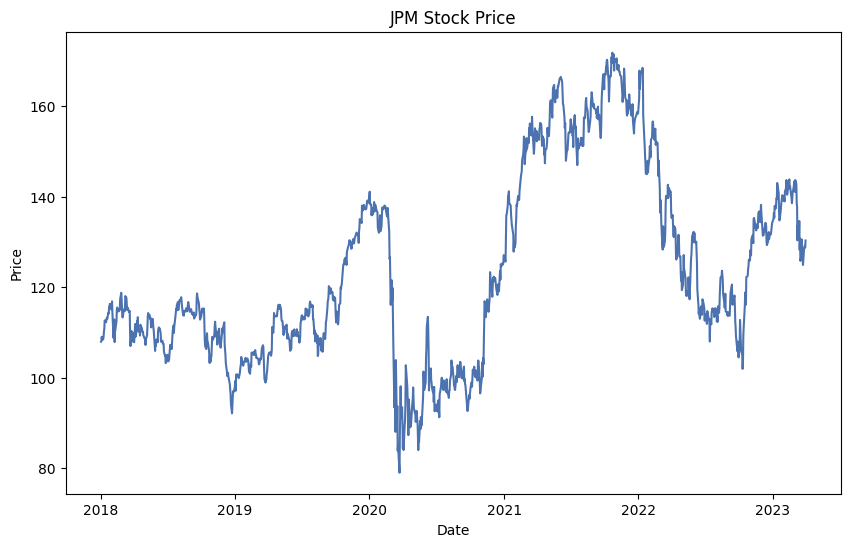

ADF Statistic: -1.8075288456544425
p-value: 0.3767302891685447
Critical Values:
   1%: -3.435363151990756
   5%: -2.863753896647996
   10%: -2.5679486910456264
Checking stationarity for MSFT:


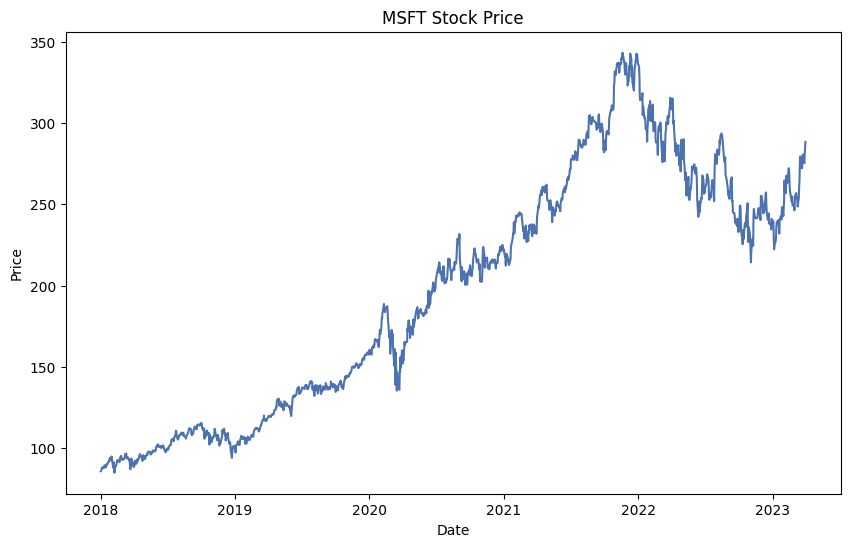

ADF Statistic: -1.0404696449561341
p-value: 0.7382193582856105
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for PG:


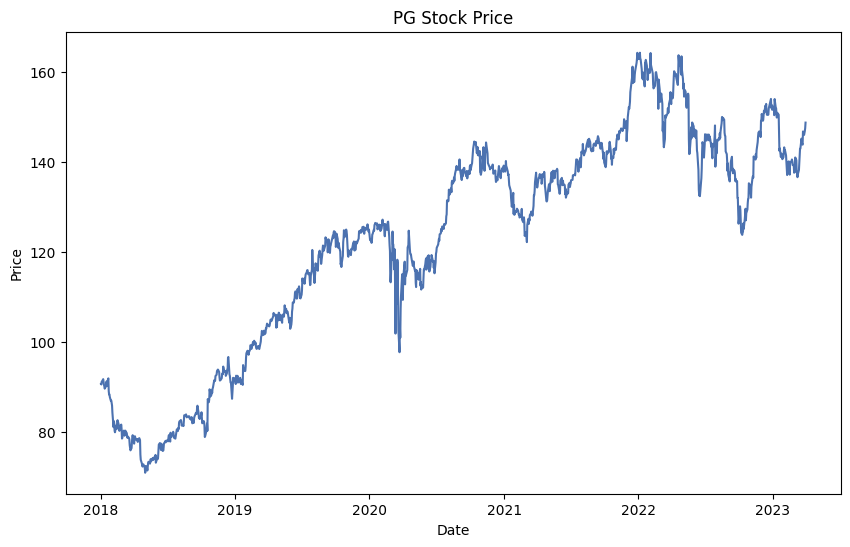

ADF Statistic: -1.2217029970429776
p-value: 0.6641906528586718
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for UNH:


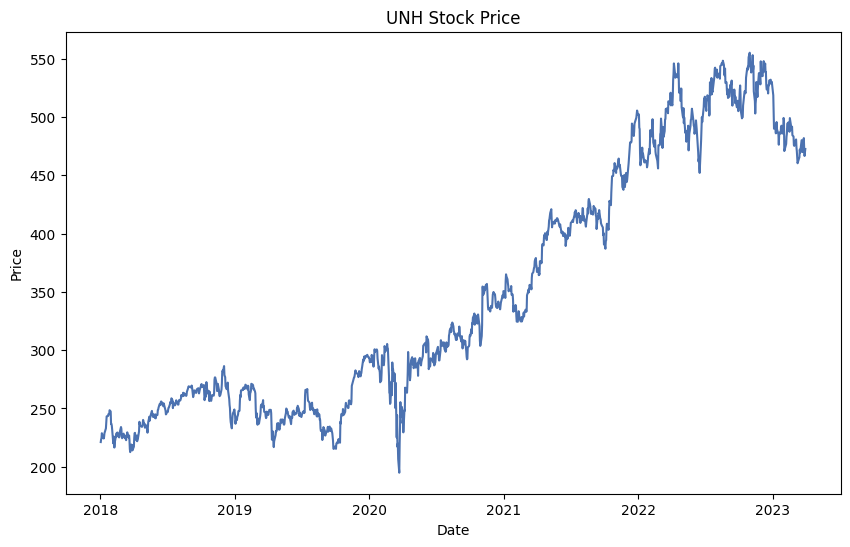

ADF Statistic: -0.7492666933763282
p-value: 0.8335724721051802
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to check for stationarity
def check_stationarity(data):
    # Augmented Dickey-Fuller test
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Assuming that the stock prices are stored in a dictionary 'data'
stocks = list(data.keys())

for stock in stocks[:-1]:
    print(f"Checking stationarity for {stock}:")
    plt.figure(figsize=(10, 6))
    plt.plot(data[stock])
    plt.title(f"{stock} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    check_stationarity(data[stock])

ARIMA stands for Autoregressive Integrated Moving Average. It is a time series forecasting model that is used to predict future values of a time series based on its past values. Let us analyse one stock in detail i.e AXP:
The values you provided suggest that you have performed an Augmented Dickey-Fuller (ADF) test on the AXP stock price data or a time series related to it. The ADF test is used to determine whether a time series is stationary or not. Stationarity is a statistical property of a time series where the mean, variance, and autocorrelation structure do not change over time.

The ADF statistic is a test statistic of the ADF test, and it measures the number of standard deviations that the series is away from being stationary. In your case, the ADF statistic is -1.5565094111814628, which indicates that the series is slightly less stationary than what is expected under the null hypothesis (i.e., the series has a unit root and is non-stationary).

The p-value is the probability of observing a test statistic as extreme or more extreme than the observed one, assuming that the null hypothesis is true. In your case, the p-value is 0.5053950711878671, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, and we conclude that the series is non-stationary.

The critical values represent the threshold values of the ADF statistic below which we reject the null hypothesis at the 1%, 5%, and 10% significance levels, respectively. In your case, the ADF statistic is greater than all three critical values (-3.435340198430096, -2.863743768394356, and -2.567943297315671), which further supports the conclusion that the series is non-stationary.

In summary, the ADF test results suggest that the AXP stock price data or the time series related to it is non-stationary, which means that it may exhibit trends or cycles over time. Therefore, if you want to use this data for forecasting or modeling, you may need to apply some time series transformations or techniques to make it stationary.


Checking stationarity for AAPL:


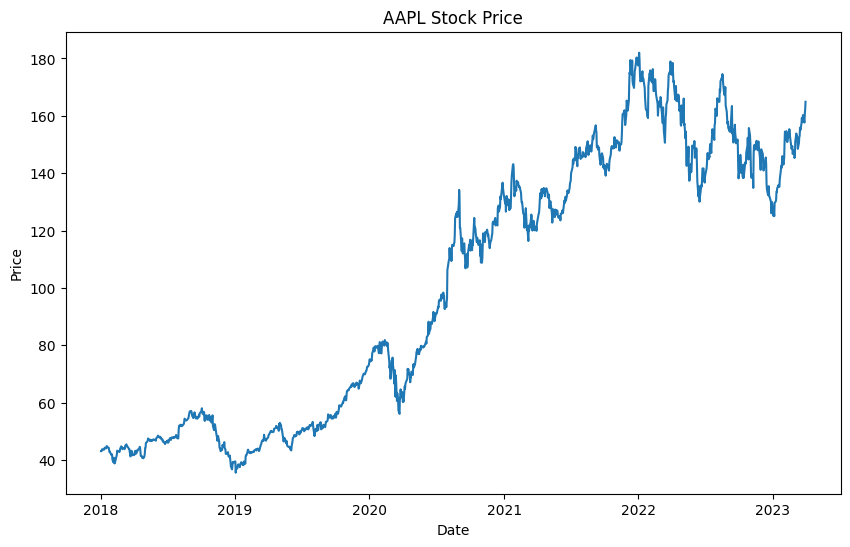

ADF Statistic: -0.7014320162037633
p-value: 0.8463782646385775
Critical Values:
   1%: -3.4353554773774553
   5%: -2.86375051023515
   10%: -2.5679468876340037
Checking stationarity for AXP:


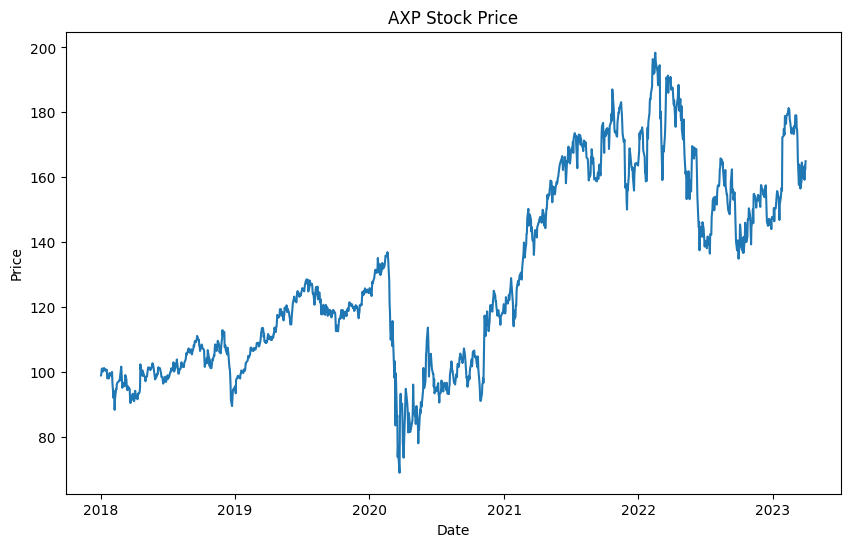

ADF Statistic: -1.5565094111814628
p-value: 0.5053950711878671
Critical Values:
   1%: -3.435340198430096
   5%: -2.863743768394356
   10%: -2.567943297315671
Checking stationarity for CRM:


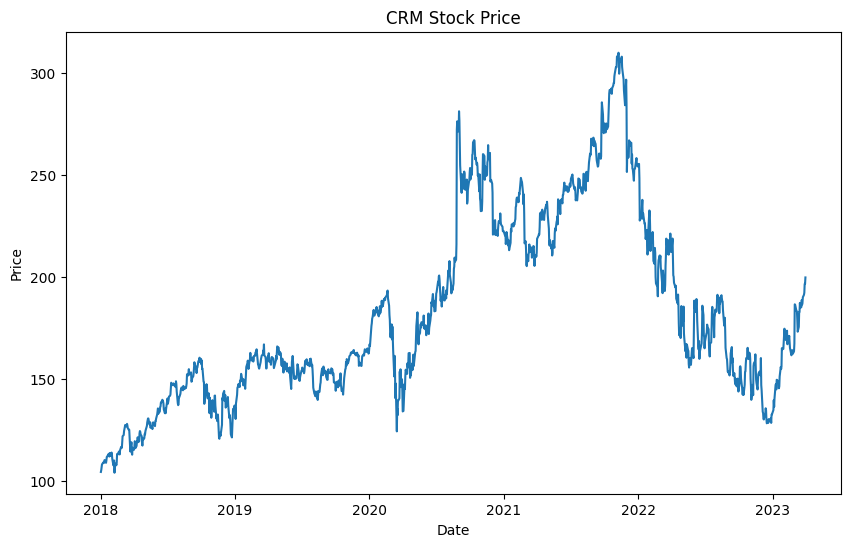

ADF Statistic: -2.010751195659798
p-value: 0.28187906169839544
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for CVX:


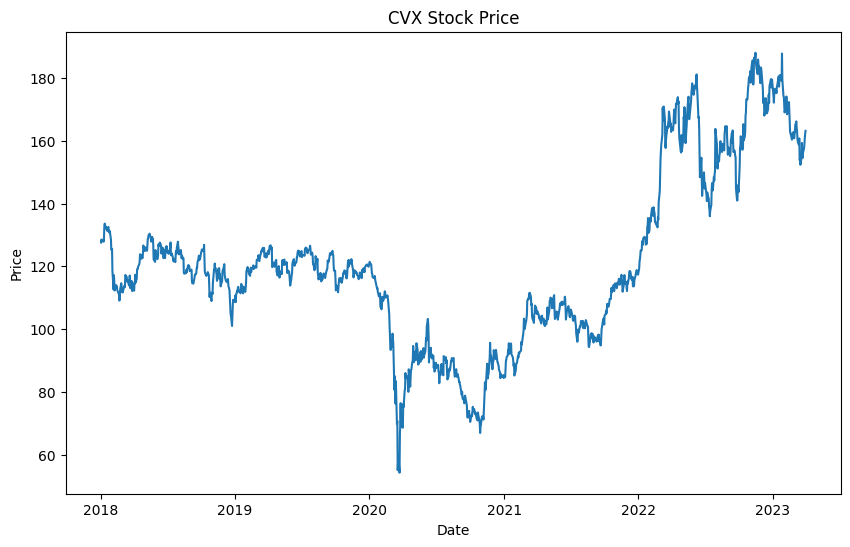

ADF Statistic: -1.3243069671812975
p-value: 0.617979791360995
Critical Values:
   1%: -3.435340198430096
   5%: -2.863743768394356
   10%: -2.567943297315671
Checking stationarity for DIS:


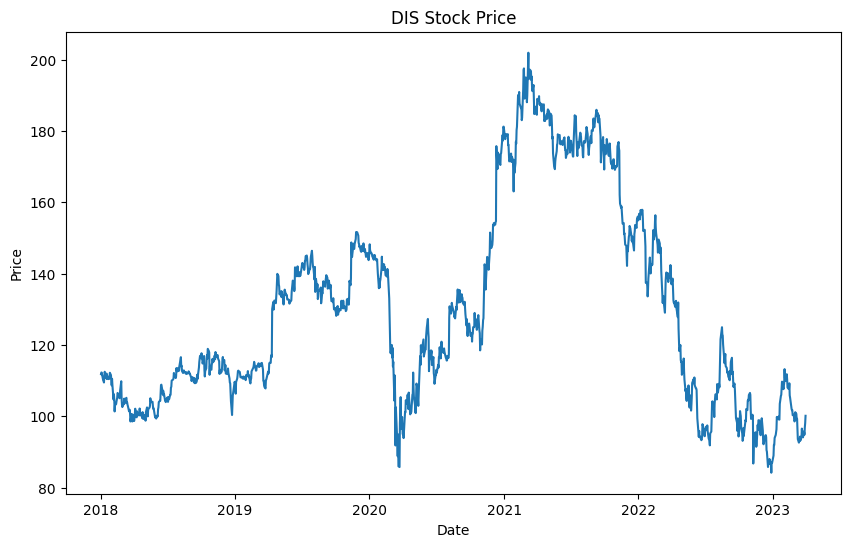

ADF Statistic: -1.596498432468659
p-value: 0.4853522047380071
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373
Checking stationarity for JNJ:


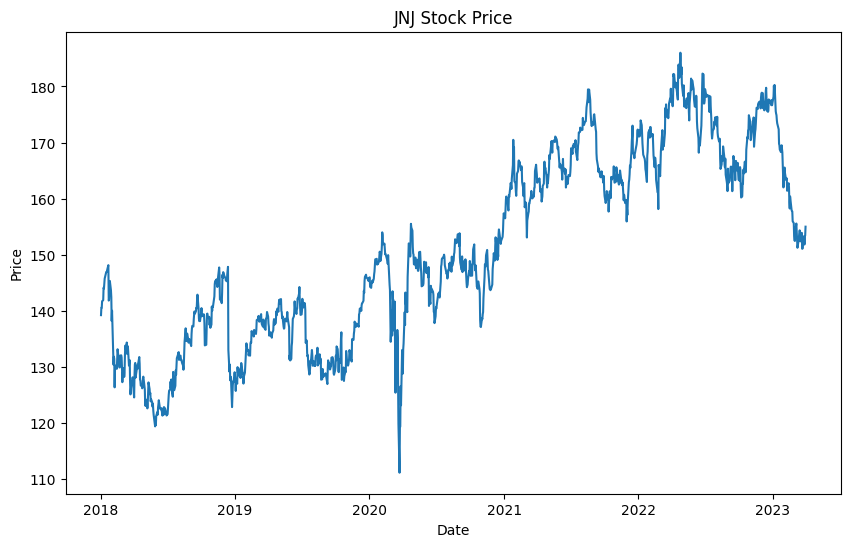

ADF Statistic: -1.777359376582526
p-value: 0.3917586444760066
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373
Checking stationarity for JPM:


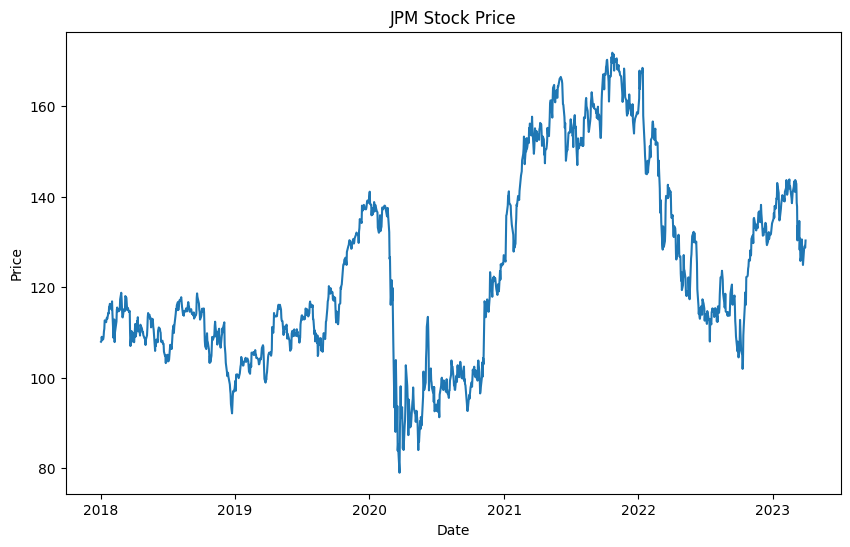

ADF Statistic: -1.8075288456544425
p-value: 0.3767302891685447
Critical Values:
   1%: -3.435363151990756
   5%: -2.863753896647996
   10%: -2.5679486910456264
Checking stationarity for MSFT:


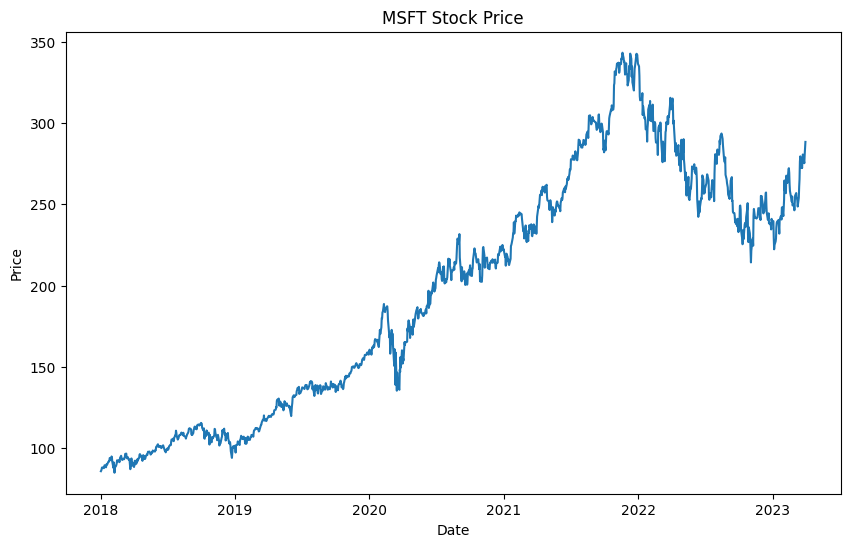

ADF Statistic: -1.0404696449561341
p-value: 0.7382193582856105
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for PG:


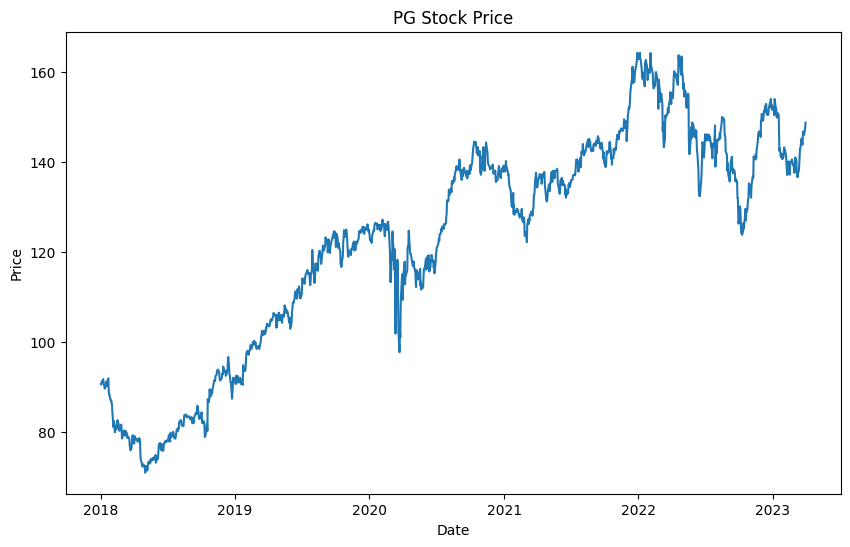

ADF Statistic: -1.2217029970429776
p-value: 0.6641906528586718
Critical Values:
   1%: -3.4353478262263777
   5%: -2.863747134166378
   10%: -2.567945089732423
Checking stationarity for UNH:


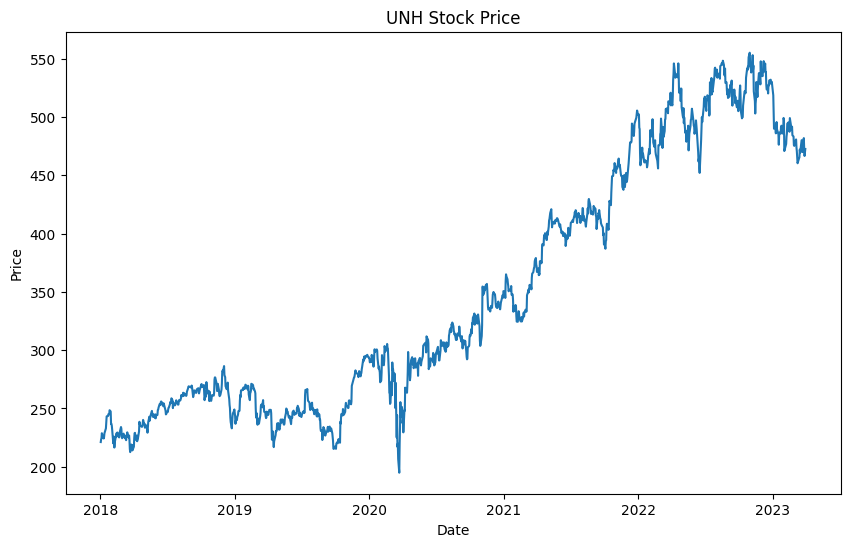

ADF Statistic: -0.7492666933763282
p-value: 0.8335724721051802
Critical Values:
   1%: -3.4353516488758684
   5%: -2.8637488209107196
   10%: -2.5679459879960373


In [21]:
# Plot the time series and check for stationarity
for stock in stocks[:-1]:
    print(f"Checking stationarity for {stock}:")
    plt.figure(figsize=(10, 6))
    plt.plot(data[stock])
    plt.title(f"{stock} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    check_stationarity(data[stock])


ARIMA MODEL OF AAPL:



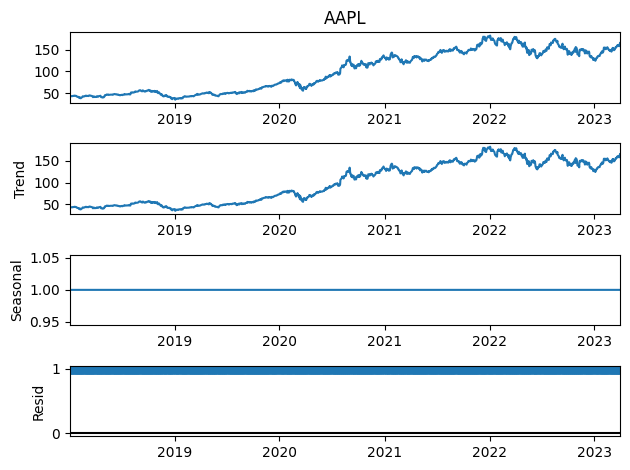

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


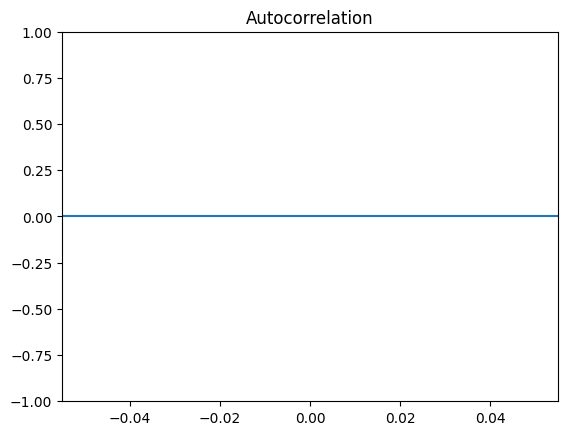

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2933.950
Date:                Tue, 04 Apr 2023   AIC                           5875.899
Time:                        21:36:04   BIC                           5896.644
Sample:                             0   HQIC                          5883.676
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4142     37.249      2.696      0.007      27.407     173.422
ar.L1          0.9991      0.001    800.154      0.000       0.997       1.002
ma.L1         -0.0558      0.020     -2.841      0.0

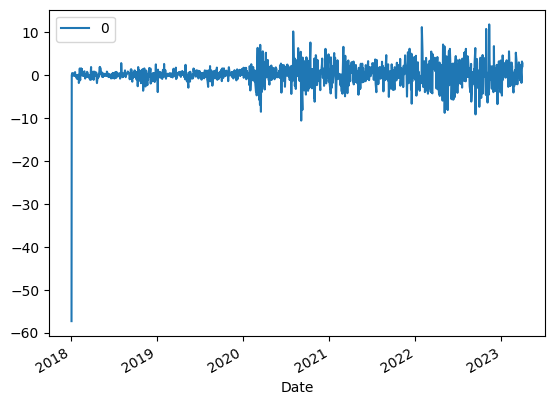

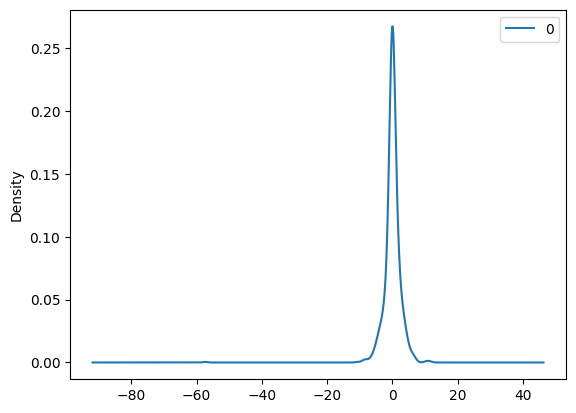

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


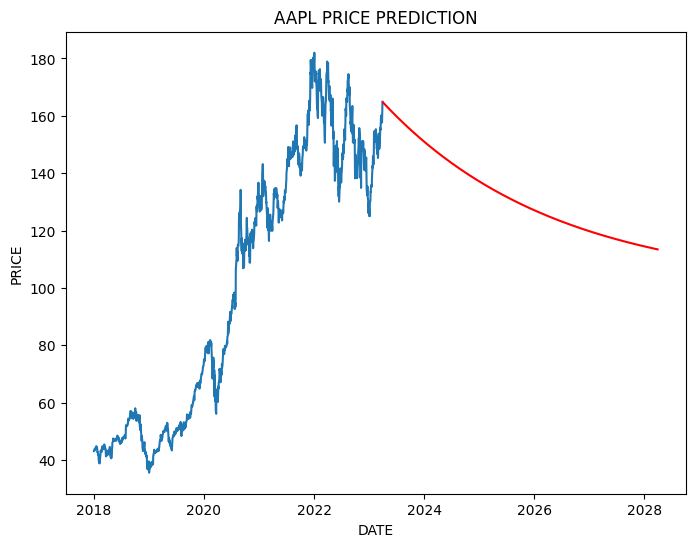


ARIMA MODEL OF AXP:



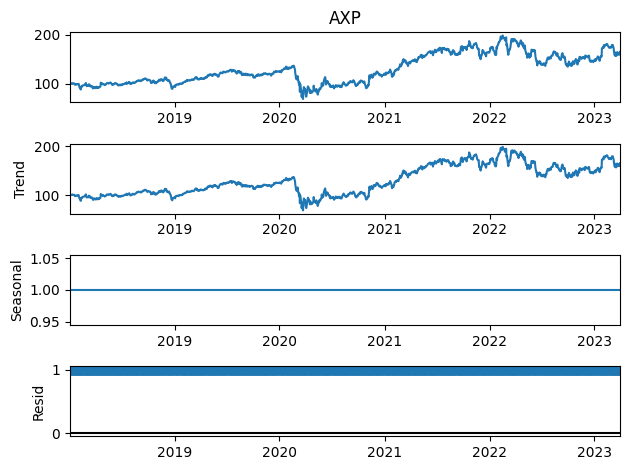

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


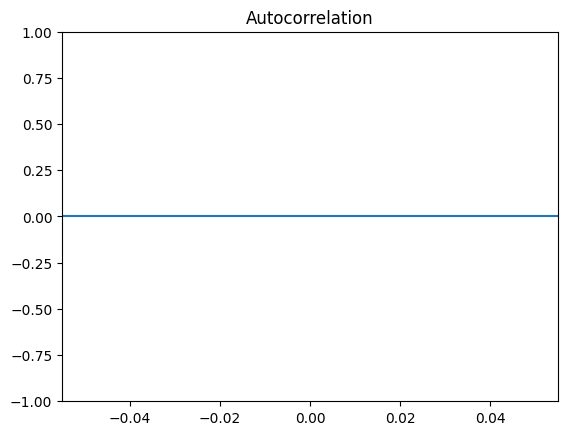

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AXP   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3239.507
Date:                Tue, 04 Apr 2023   AIC                           6487.014
Time:                        21:36:06   BIC                           6507.759
Sample:                             0   HQIC                          6494.792
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.6995     16.159      8.026      0.000      98.028     161.372
ar.L1          0.9960      0.002    459.875      0.000       0.992       1.000
ma.L1         -0.0351      0.018     -1.963      0.0

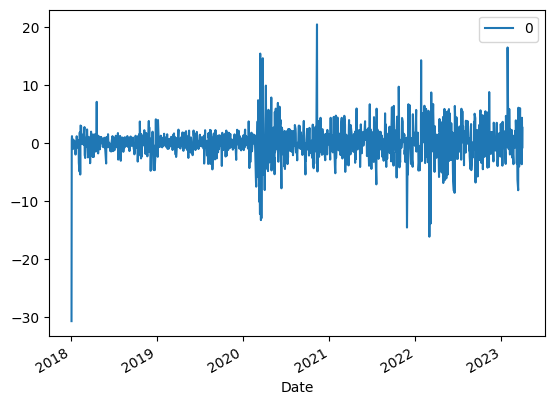

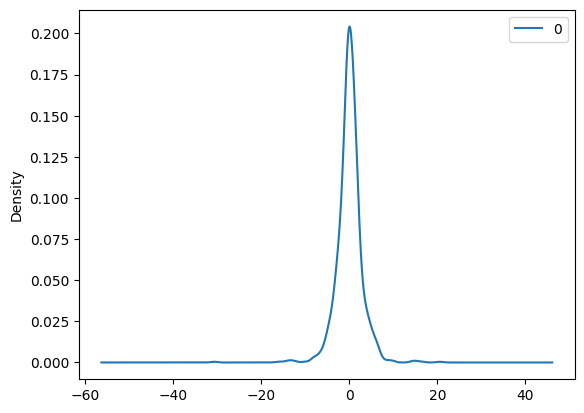

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


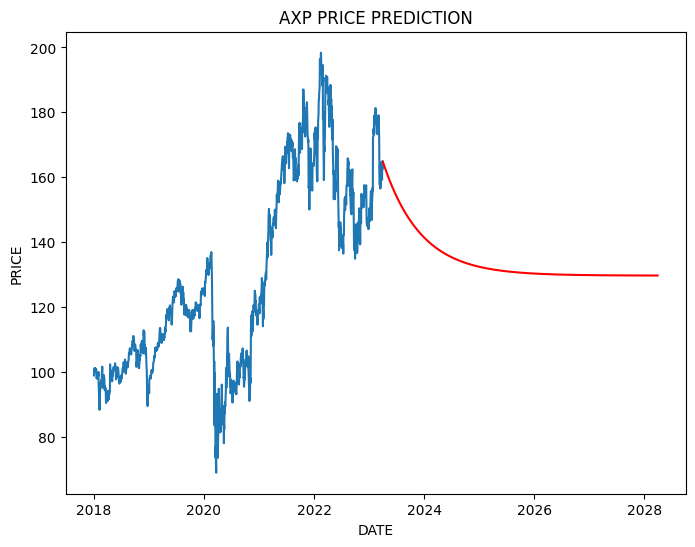


ARIMA MODEL OF CRM:



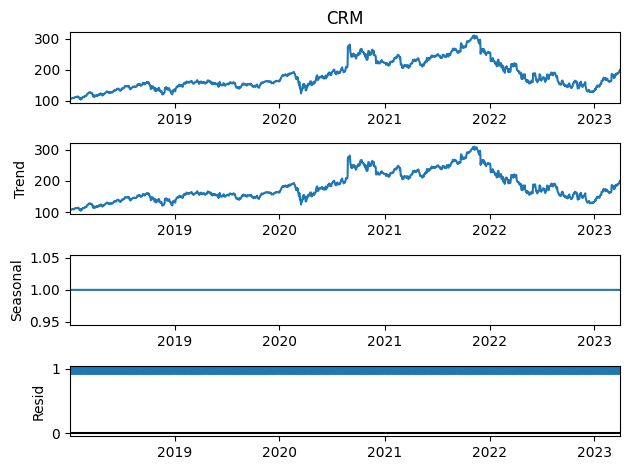

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


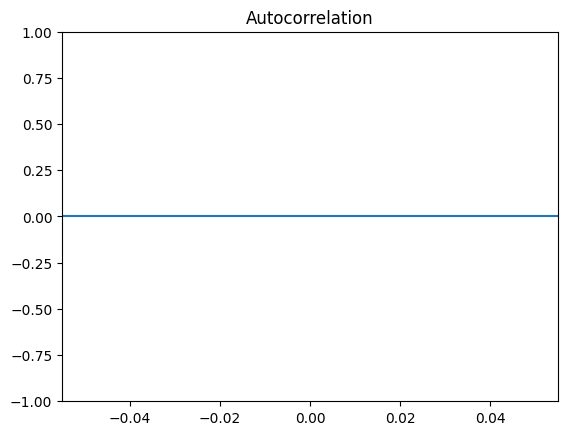

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    CRM   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3874.344
Date:                Tue, 04 Apr 2023   AIC                           7756.689
Time:                        21:36:09   BIC                           7777.433
Sample:                             0   HQIC                          7764.466
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.7776     20.310      8.950      0.000     141.970     221.585
ar.L1          0.9954      0.002    431.909      0.000       0.991       1.000
ma.L1          0.0042      0.021      0.201      0.8

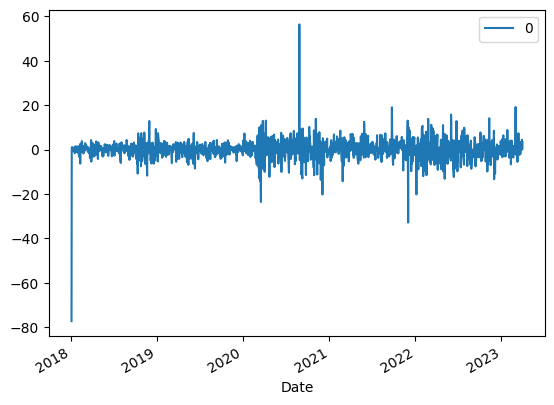

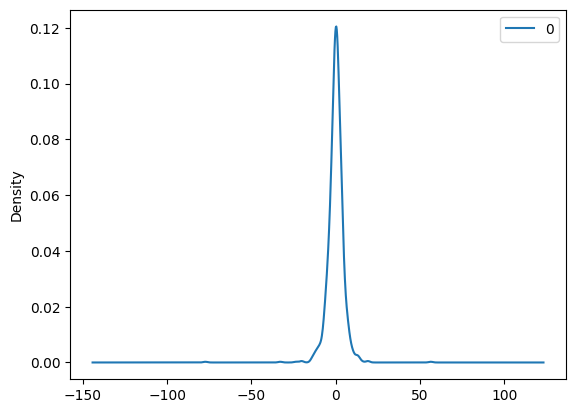

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


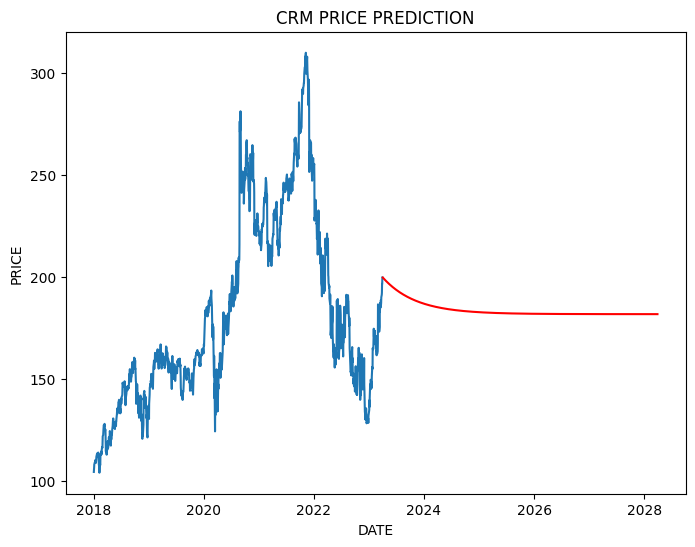


ARIMA MODEL OF CVX:



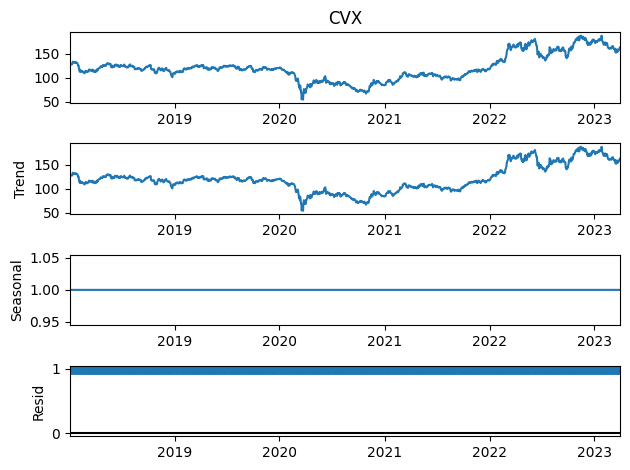

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


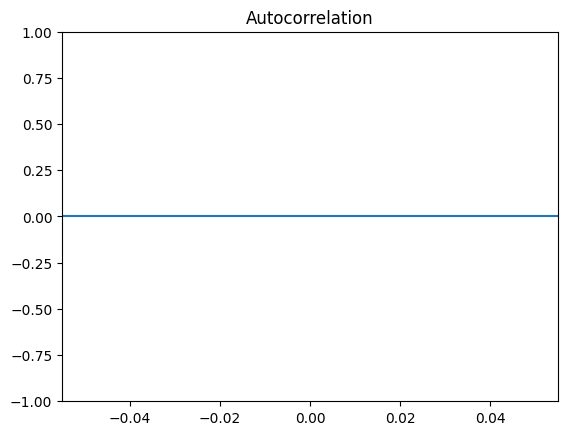

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    CVX   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3019.638
Date:                Tue, 04 Apr 2023   AIC                           6047.277
Time:                        21:36:12   BIC                           6068.022
Sample:                             0   HQIC                          6055.054
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.2116     18.855      6.800      0.000      91.256     165.167
ar.L1          0.9966      0.002    594.991      0.000       0.993       1.000
ma.L1         -0.0441      0.020     -2.221      0.0

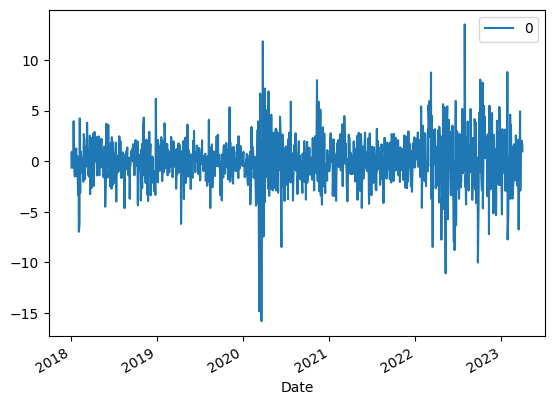

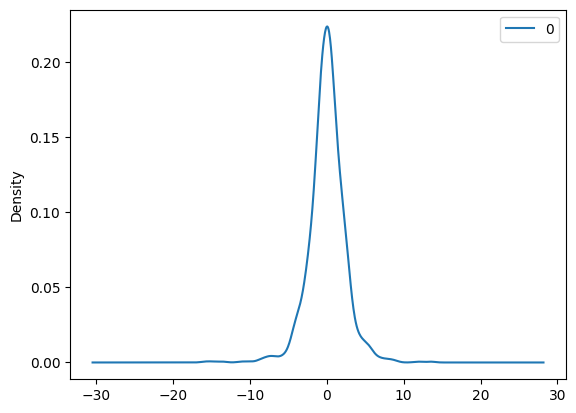

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


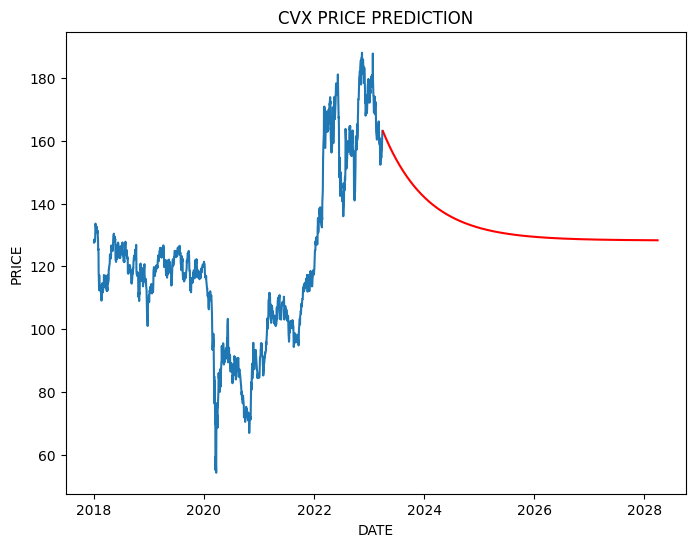


ARIMA MODEL OF DIS:



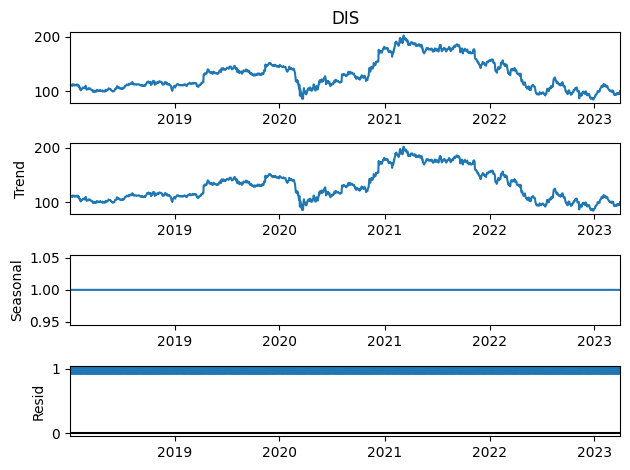

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


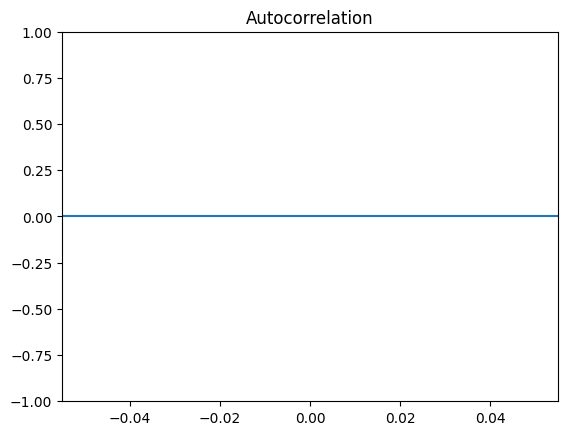

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    DIS   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3097.169
Date:                Tue, 04 Apr 2023   AIC                           6202.337
Time:                        21:36:16   BIC                           6223.082
Sample:                             0   HQIC                          6210.115
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.2633     16.254      7.953      0.000      97.407     161.120
ar.L1          0.9962      0.002    457.222      0.000       0.992       1.000
ma.L1         -0.0589      0.019     -3.036      0.0

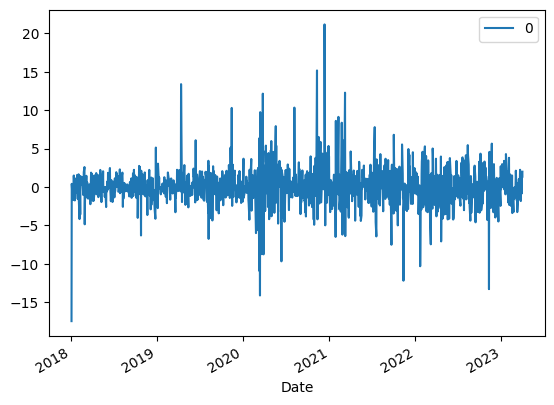

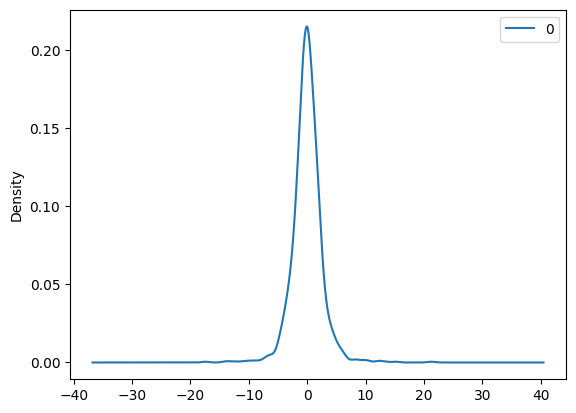

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


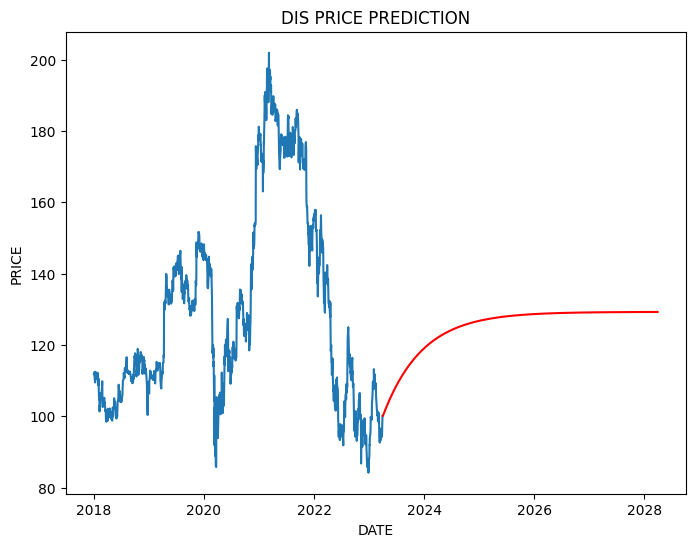


ARIMA MODEL OF JNJ:



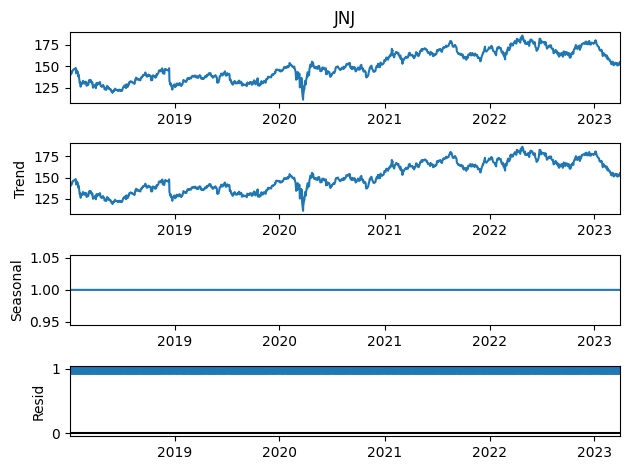

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


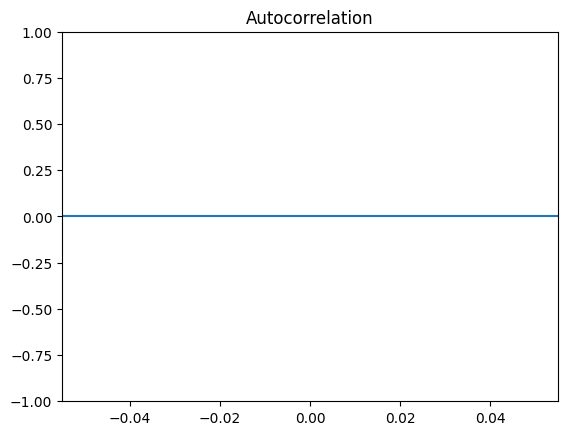

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    JNJ   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2703.684
Date:                Tue, 04 Apr 2023   AIC                           5415.367
Time:                        21:36:19   BIC                           5436.112
Sample:                             0   HQIC                          5423.145
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7866      8.237     18.306      0.000     134.643     166.931
ar.L1          0.9944      0.003    347.938      0.000       0.989       1.000
ma.L1         -0.0848      0.017     -4.941      0.0

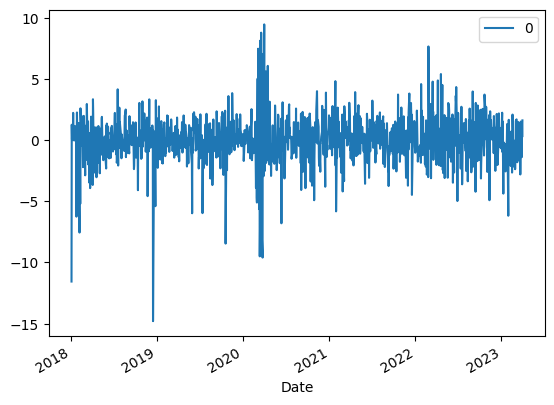

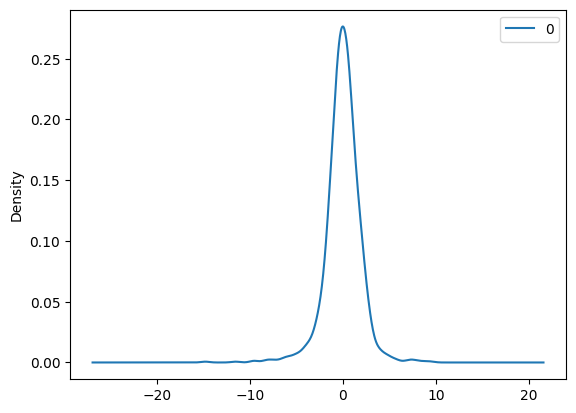

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


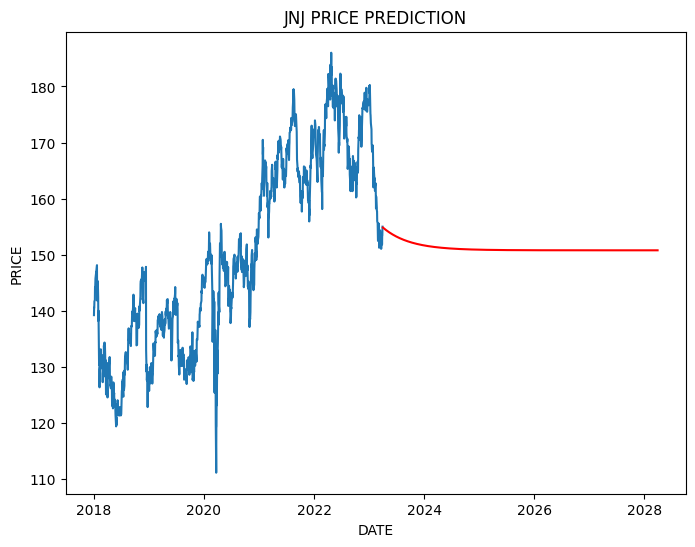


ARIMA MODEL OF JPM:



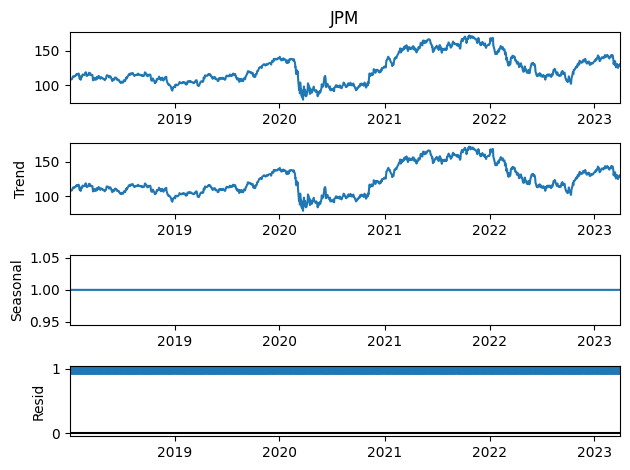

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


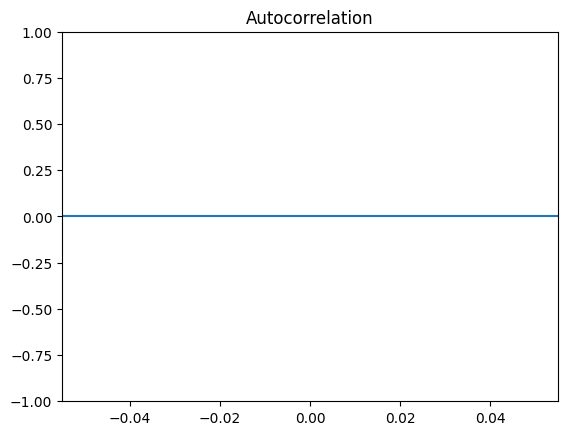

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    JPM   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2950.611
Date:                Tue, 04 Apr 2023   AIC                           5909.222
Time:                        21:36:21   BIC                           5929.967
Sample:                             0   HQIC                          5916.999
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.5421      9.986     12.371      0.000     103.969     143.115
ar.L1          0.9946      0.002    403.989      0.000       0.990       0.999
ma.L1         -0.0667      0.014     -4.659      0.0

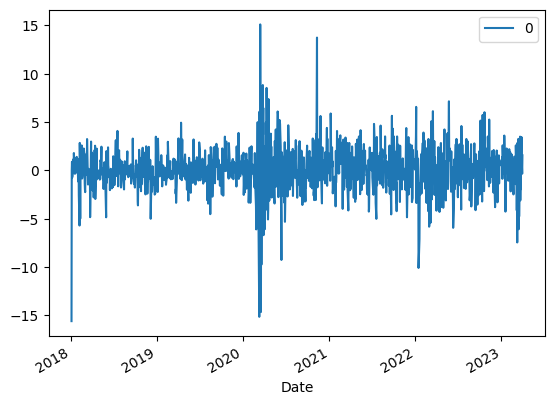

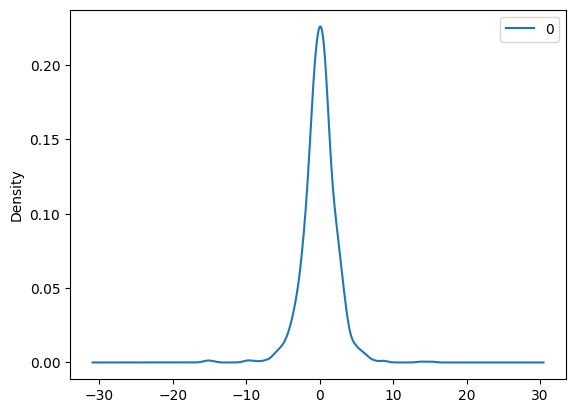

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


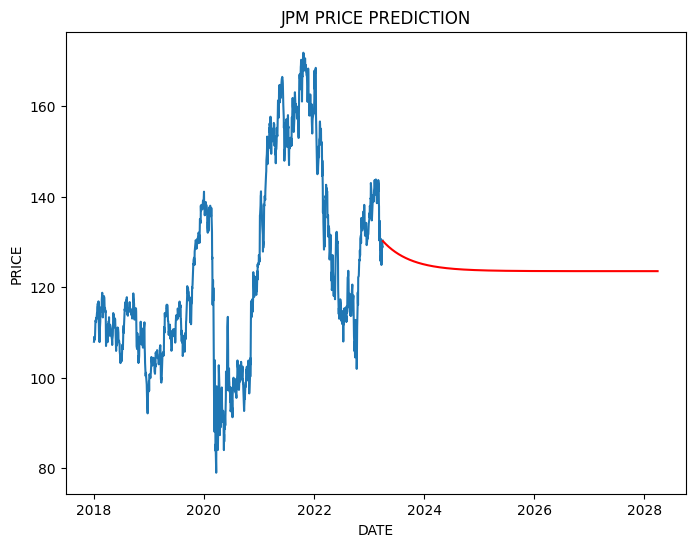


ARIMA MODEL OF MSFT:



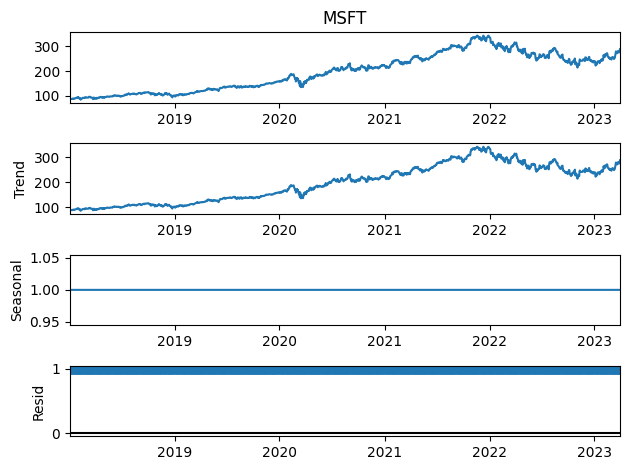

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


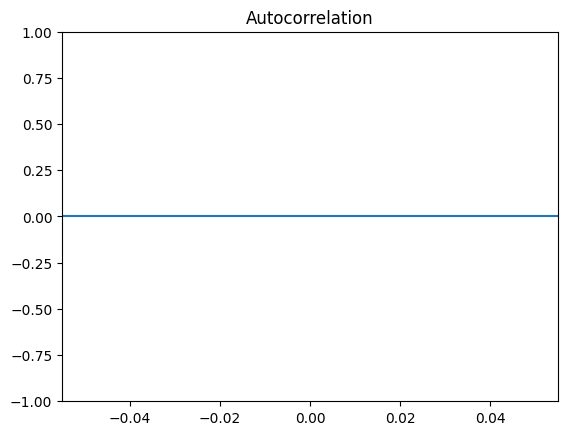

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3691.359
Date:                Tue, 04 Apr 2023   AIC                           7390.719
Time:                        21:36:24   BIC                           7411.464
Sample:                             0   HQIC                          7398.496
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.5958     61.840      3.179      0.001      75.392     317.799
ar.L1          0.9992      0.001    810.922      0.000       0.997       1.002
ma.L1         -0.1084      0.019     -5.818      0.0

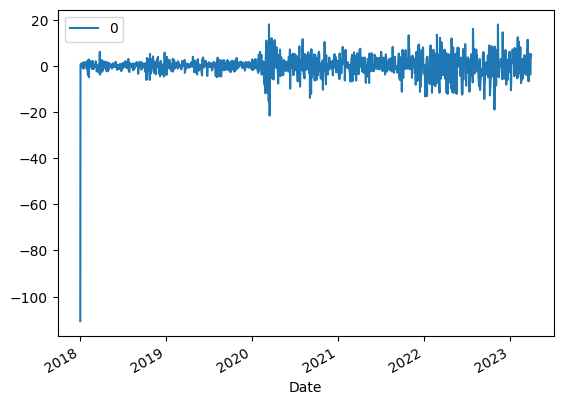

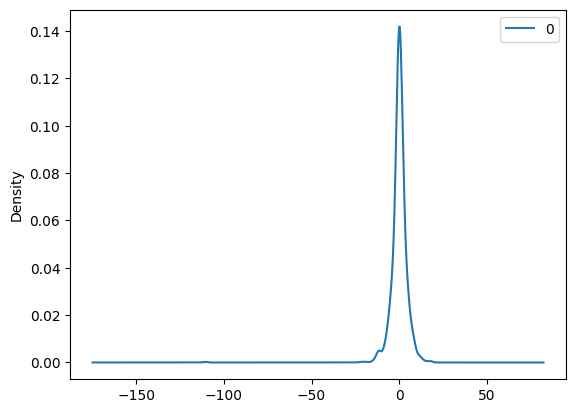

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


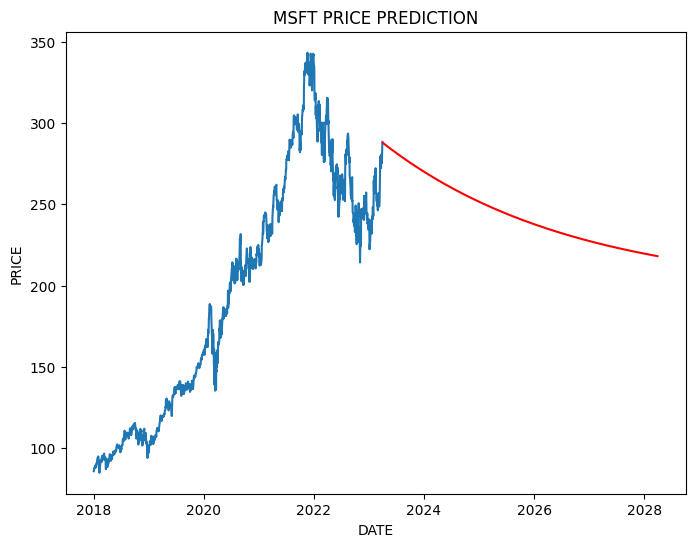


ARIMA MODEL OF PG:



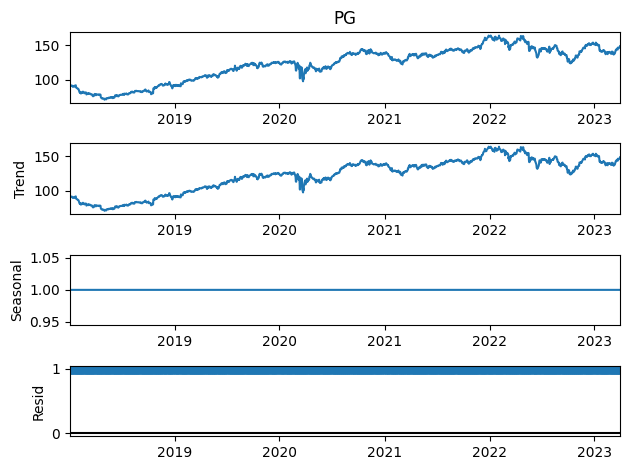

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


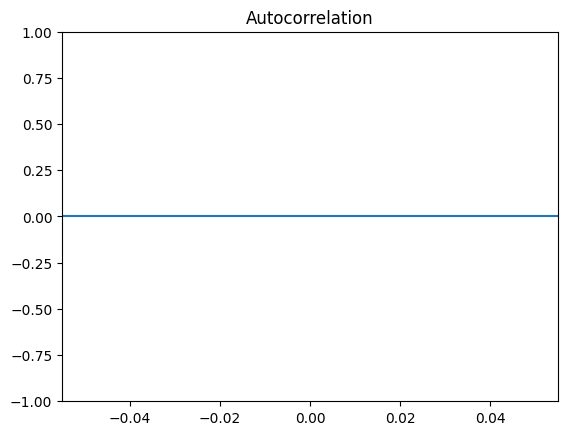

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     PG   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2528.453
Date:                Tue, 04 Apr 2023   AIC                           5064.906
Time:                        21:36:27   BIC                           5085.651
Sample:                             0   HQIC                          5072.683
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.5003     13.580      9.021      0.000      95.885     149.116
ar.L1          0.9980      0.002    544.505      0.000       0.994       1.002
ma.L1         -0.0972      0.013     -7.680      0.0

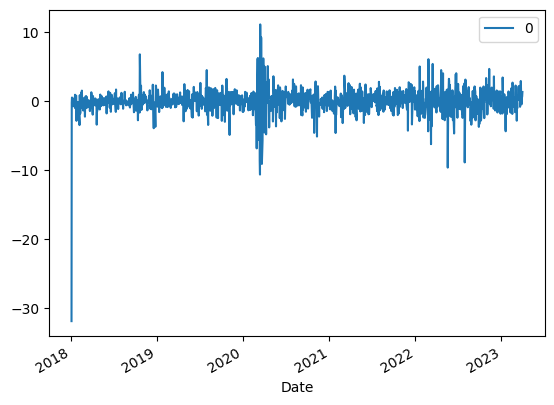

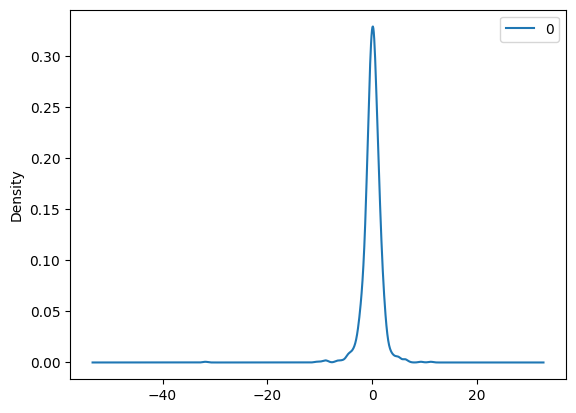

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


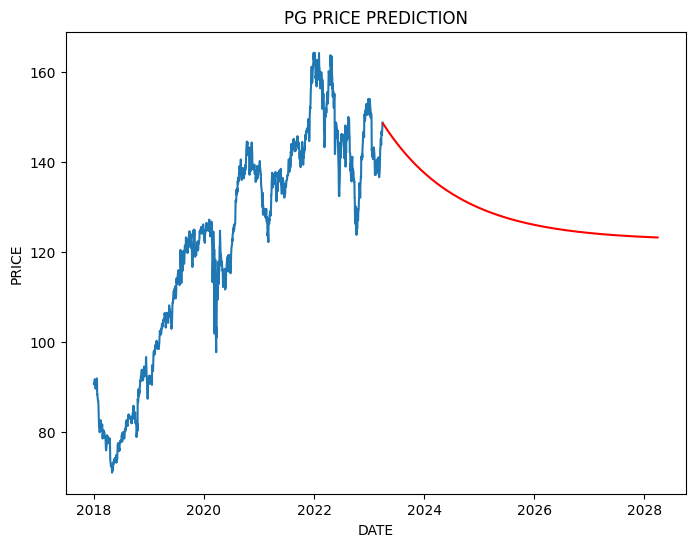


ARIMA MODEL OF UNH:



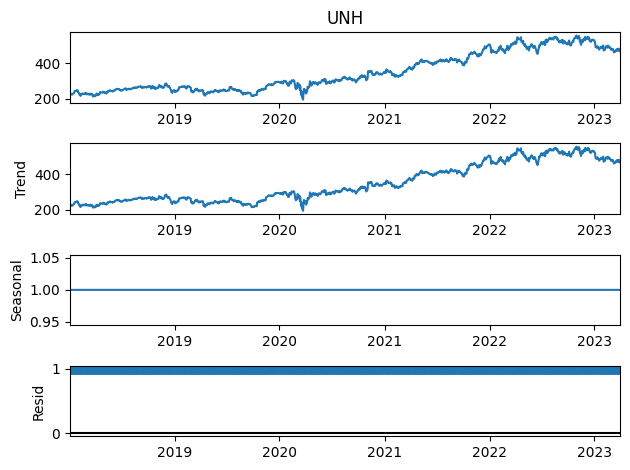

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


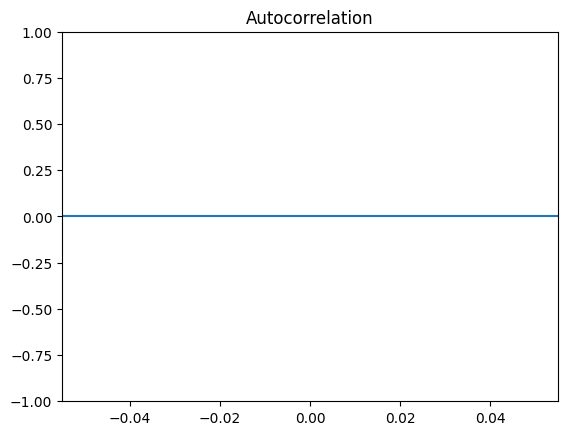

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    UNH   No. Observations:                 1321
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4237.748
Date:                Tue, 04 Apr 2023   AIC                           8483.497
Time:                        21:36:30   BIC                           8504.241
Sample:                             0   HQIC                          8491.274
                               - 1321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.1057     69.513      5.022      0.000     212.863     485.348
ar.L1          0.9986      0.001    782.784      0.000       0.996       1.001
ma.L1         -0.0683      0.018     -3.714      0.0

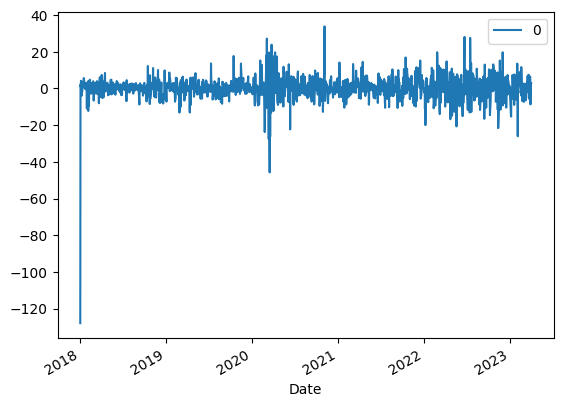

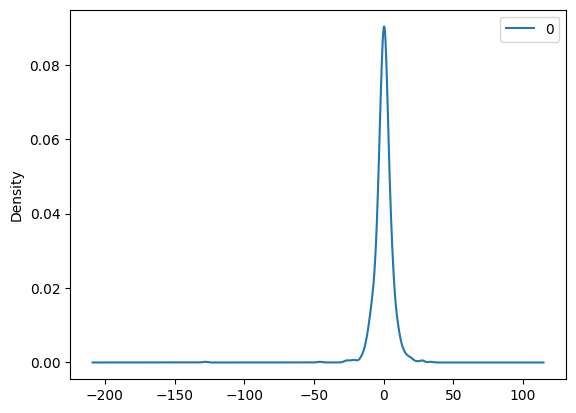

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


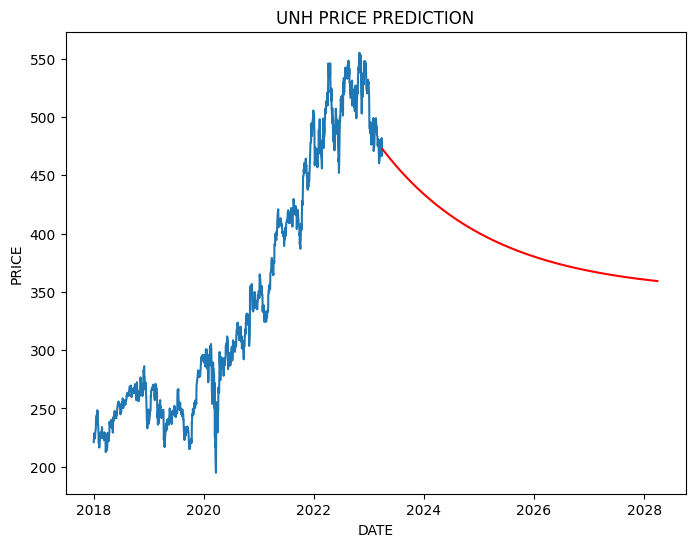

In [22]:

# Choose the best values for p, d, and q
for stock in stocks[:-1]:
    print(f"\nARIMA MODEL OF {stock}:\n")
    decom = seasonal_decompose(data[stock], model='multiplicative', period=1)
    decom.plot()
    plt.show()
    plot_acf(decom.resid, lags=50)
    plt.show()
    model = ARIMA(data[stock], order=(1, 0, 1))
    results = model.fit()
    print(results.summary())
    residuals = pd.DataFrame(results.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    
    # Forecast the values for the next 5 years
    forecast = results.forecast(steps=1823)
    forecast_index = pd.date_range(start='2023-04-03', end='2028-03-29')
    plt.figure(figsize=(8, 6))
    plt.plot(data[stock]['2018-01-01':])
    plt.plot(forecast_index, forecast, color='red')
    plt.title(f"{stock} PRICE PREDICTION")
    plt.xlabel("DATE")
    plt.ylabel("PRICE")
    plt.show()

In [23]:
! pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.7 MB/s eta 0:00:00



Maximum Sharpe Ratio :
OrderedDict([('AAPL', 0.59141), ('AXP', 0.0), ('CRM', 0.0), ('CVX', 0.0), ('DIS', 0.0), ('JNJ', 0.0), ('JPM', 0.0), ('MSFT', 0.39378), ('PG', 0.0), ('UNH', 0.01481), ('^IXIC', 0.0)])

Expected Return:  0.27745016480349294

Volatility:  0.30221277211762904

Minimum Volatility Portfolio Weights:
OrderedDict([('AAPL', 0.0), ('AXP', 0.0), ('CRM', 0.0), ('CVX', 0.04132), ('DIS', 0.04883), ('JNJ', 0.42394), ('JPM', 0.0), ('MSFT', 0.0), ('PG', 0.33738), ('UNH', 0.0), ('^IXIC', 0.14854)])

Expected Return:  0.05981493525069649

Volatility:  0.18206683129443735


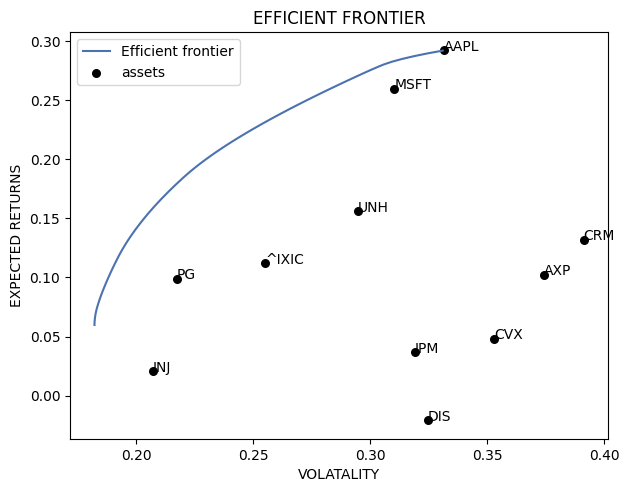

In [24]:

from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt
a = expected_returns.mean_historical_return(data)
b = risk_models.sample_cov(data)
# Optimize the portfolio for maximum Sharpe ratio
ef_max_shrp = EfficientFrontier(a, b)
weights_max_shrp = ef_max_shrp.max_sharpe()
cl_weights_max_sharpe = ef_max_shrp.clean_weights()
print("\nMaximum Sharpe Ratio :")
print(cl_weights_max_sharpe)
print("\nExpected Return: ", ef_max_shrp.portfolio_performance(verbose=False)[0])
print("\nVolatility: ", ef_max_shrp.portfolio_performance(verbose=False)[1])
# Optimize the portfolio for minimum volatility
ef_min_vol = EfficientFrontier(a, b)
weights_min_vol = ef_min_vol.min_volatility()
cl_weights_min_vol = ef_min_vol.clean_weights()
print("\nMinimum Volatility Portfolio Weights:")
print(cl_weights_min_vol)
print("\nExpected Return: ", ef_min_vol.portfolio_performance(verbose=False)[0])
print("\nVolatility: ", ef_min_vol.portfolio_performance(verbose=False)[1])
# Plot the Efficient Frontier
ef_efficient_frontier = EfficientFrontier(a, b)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_efficient_frontier, ax=ax, show_assets=True,show_tickers=True)
plt.title('EFFICIENT FRONTIER')
plt.xlabel('VOLATALITY')
plt.ylabel('EXPECTED RETURNS')
plt.show()


## Interpretation:

The Maximum Sharpe Ratio portfolio is a portfolio that achieves the highest Sharpe Ratio, which is a measure of risk-adjusted return. The Sharpe Ratio is calculated as the excess return of the portfolio over the risk-free rate divided by the portfolio's standard deviation. In your case, the Maximum Sharpe Ratio portfolio consists of 59.141% of Apple stocks and 39.378% of Microsoft stocks, with a small allocation of 1.481% to UnitedHealth Group. The remaining assets have a zero allocation. The expected return of the Maximum Sharpe Ratio portfolio is 27.745% per year, while its volatility is 30.221%. This portfolio is expected to provide the highest risk-adjusted return among all possible portfolios.

The Minimum Volatility portfolio, on the other hand, is a portfolio that achieves the lowest portfolio volatility or standard deviation. In your case, the Minimum Volatility portfolio consists of a mix of assets, including Chevron, Disney, Johnson & Johnson, Procter & Gamble, and NASDAQ Composite. The weights of these assets are determined by an optimization algorithm, which minimizes the portfolio volatility while satisfying certain constraints, such as the sum of all weights adding up to 1. The expected return of the Minimum Volatility portfolio is 5.981% per year, while its volatility is 18.207%. This portfolio is expected to provide the lowest risk among all possible portfolios.

In summary, the output you provided describes the optimal portfolio allocations and their associated risk and return metrics for two different portfolio optimization strategies: Maximum Sharpe Ratio and Minimum Volatility. These portfolios can be useful for investors who want to achieve a specific risk-return tradeoff or diversify their investments across multiple assets. However, it's important to note that these portfolios are based on historical data and assumptions, and their actual performance in the future may deviate from these estimates.

References:

https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

https://github.com/damianboh/portfolio_optimization/blob/main/Max%20Sharpe%20Ratio%20Portfolio%20Optimization%20for%20Stocks%20Using%20PyPortfolioOpt.ipynb